In [1]:
% matplotlib inline
import numpy as np
import matplotlib as mpl
import pandas as pd
from matplotlib import pyplot as plt
mpl.style.use('bmh')

# データ取り込み

In [5]:
tmp = np.genfromtxt('GaussianProcessData20121209.txt')
data = tmp.T



# class定義

In [6]:
# ガウス過程による回帰を行うクラス
class GaussianProcessRegression():
    # カーネル関数とノイズの精度パラメータの初期化
    def __init__(self, alpha, beta, sigma, xob, yob, xpre):
        self.alpha = alpha
        self.beta = beta
        self.sigma = sigma
        self.xob = xob
        self.yob = yob 
        self.xpre = xpre
        
    def kernelfunc(self, x1, x2):
        sigma = self.sigma
        xob = self.xob
        yob = self.yob 
        xpre = self.xpre
        return np.exp(-1/(2*sigma**2)*(x1-x2)**2) #np.exp(-1/(2*sigma**2)*(X - Y)**2
    
    def calc(self):
        alpha = self.alpha
        beta = self.beta
        sigma = self.sigma
        xob = self.xob
        yob = self.yob 
        xpre = self.xpre
        # グラム行列の計算 PRML式(6.54)
        X, Y = np.meshgrid(xob, xob)
        Gram = 1/alpha*self.kernelfunc(Y,X)
        # 共分散行列の計算 PRML式(6.62)
        covariance = Gram + np.identity(len(xob))/beta #np.identifyは単位行列
        # 精度行列の計算
        precision = np.linalg.inv(covariance)
        
        Kx1, Kx2 = np.meshgrid(xob, xpre)
        K = 1/alpha*self.kernelfunc(Kx1, Kx2)
        # 予測分布の平均を計算 PRML式(6.66)
        mean = K.dot(precision).dot(yob)
        # 予測分布の分散を計算 PRML式(6.67)
        var = ( 1/alpha*self.kernelfunc(xpre, xpre) + 1/beta*np.ones(np.shape(xpre)) ) - np.sum(K.dot(precision)*K, axis = 1)
        return mean, var.T**(1/2)


# Calc

In [7]:
# alpha, beta, sigma, xob, yob, xpre
xpre = np.arange(-7,7,0.01)
hw = GaussianProcessRegression(0.16, 1.0, 0.25**(1/2), data[0], data[1], xpre)
IF, SD = hw.calc()
IF, SD

(array([-2.27674415e-05, -2.50639419e-05, -2.75810058e-05, ...,
         1.06578360e-03,  9.83360345e-04,  9.06939500e-04]),
 array([2.6925824 , 2.6925824 , 2.6925824 , ..., 2.69258221, 2.69258224,
        2.69258227]))

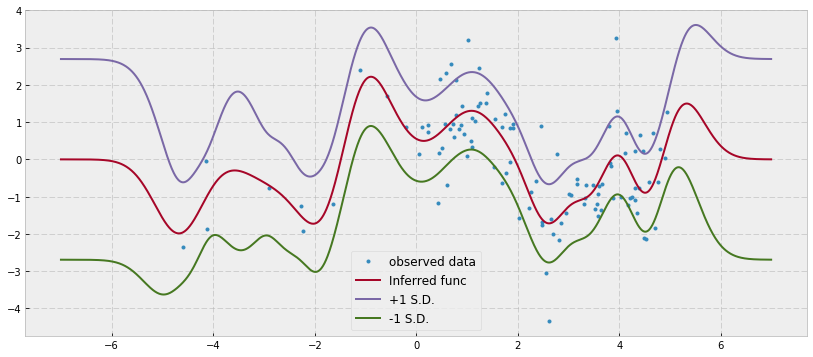

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches([14, 6])  
ax.plot(data[0],data[1],'.',label = 'observed data')
ax.plot(xpre, IF, label = 'Inferred func')
ax.plot(xpre, IF + SD, label = '+1 S.D.')
ax.plot(xpre, IF - SD, label = '-1 S.D.')
#plt.ylim(-4,4)
#plt.xlim(-8,8)
plt.legend(fontsize = 12)

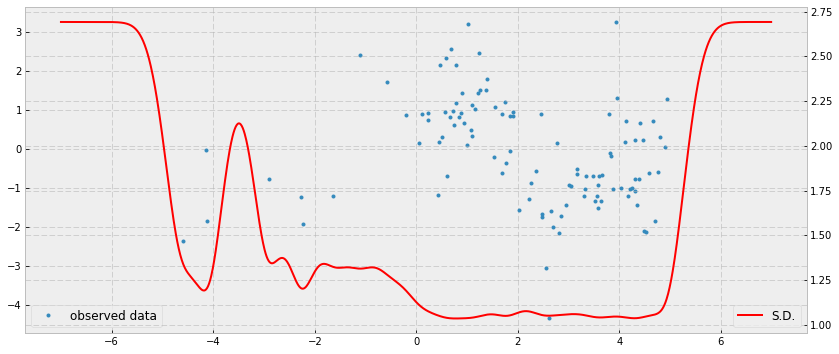

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches([14, 6])  
ax.plot(data[0],data[1],'.',label = 'observed data')
ax.legend(loc = "lower left",fontsize = 12)
ax2 = ax.twinx()
ax2.plot(xpre, SD, color = "r", label = 'S.D.')
ax2.legend(loc ="lower right", fontsize = 12)


観測データが多いところの$x^{(*)}$付近では標準偏差が小さくなることが確認できた。